<a href="https://colab.research.google.com/github/gani0325/2022/blob/main/BOAZ/%EB%AF%B8%EB%8B%88%ED%94%8C%EC%A0%9D6%EC%9B%94/v0_3_220625_%EB%A9%9C%EB%A1%A0_%EA%B0%90%EC%A0%95%EC%82%AC%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Mecab 형태소 분석기, konlpy 쉽게 설치https://teddylee777.github.io/colab/colab-mecab

In [ ]:
# konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-06-24 15:08:06--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-06-24 15:08:06--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc83c6d96d461f9f266429dec73f.dl.dropboxusercontent.com/cd/0/get/Bn0rIkaT46MEsX2uy77cMBQ61GZlJBPIbX9TCCqgnb8nhzP58tmdPyNnIxkNEucsAJKoH7l-4ovfh3NrpPCpwyeH3Nga2u08X9KQ7z6cEOzGww2dS4-X30IAXI_AGtPzNPeipT32WuQT_n9YEX3lunso6qLTG_ycDfbRve9KHaCPAa71Ur8FRIxHJPN0RX5cstY/file?dl=1# [following]
--2022-06-24 15:08:07--  https://uc83c6d96d461f9f266429dec73f.dl.dropboxusercontent.com/cd/0/get/

In [ ]:
# 정상 동작 확인
from konlpy.tag import Okt, Mecab

okt = Okt()
mecab = Mecab()

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#GPU 사용
device = torch.device("cuda:0")

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/가은/BOAZ/미니플젝_2022_06/코드/최종멜론_2010to2021_노래가사크롤링.csv")

In [ ]:
train.shape

(50464, 6)

In [ ]:
train.head(10)

,Unnamed: 0,lyrics,artist,song_name,Year,trans_lyrics
0,8,앞에선 한마디도 못하더니,미쓰에이,Bad Girl Good Girl,2010,앞에선 한마디도 못하더니
1,9,뒤에선 내 얘길 안 좋게 해,미쓰에이,Bad Girl Good Girl,2010,뒤에선 내 얘길 안 좋게 해
2,10,참 어이가 없어,미쓰에이,Bad Girl Good Girl,2010,참 어이가 없어
3,12,나 같은 여잔 처음,미쓰에이,Bad Girl Good Girl,2010,나 같은 여잔 처음
4,13,으로 으로 으로,미쓰에이,Bad Girl Good Girl,2010,으로 으로 으로
5,14,본 것 같은데 왜 나를 판단하니,미쓰에이,Bad Girl Good Girl,2010,본 것 같은데 왜 나를 판단하니
6,15,내가 혹시 두려운 거니,미쓰에이,Bad Girl Good Girl,2010,내가 혹시 두려운 거니
7,18,나를 잘 알지도 못하면서,미쓰에이,Bad Girl Good Girl,2010,나를 잘 알지도 못하면서
8,19,내 겉모습만 보면서,미쓰에이,Bad Girl Good Girl,2010,내 겉모습만 보면서
9,20,한심한 여자로 보는,미쓰에이,Bad Girl Good Girl,2010,한심한 여자로 보는


In [ ]:
train["trans_lyrics"].isnull().sum()

0

In [ ]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train['trans_lyrics'] if type(review) is str]
train_review

['앞에선 한마디도 못하더니',
 '뒤에선 내 얘길 안 좋게 해',
 '참 어이가 없어',
 '나 같은 여잔 처음',
 '으로 으로 으로',
 '본 것 같은데 왜 나를 판단하니',
 '내가 혹시 두려운 거니',
 '나를 잘 알지도 못하면서',
 '내 겉모습만 보면서',
 '한심한 여자로 보는',
 '너의 시선이 난 너무나 웃겨',
 '춤추는 내 모습을 볼 때는',
 '넋을 놓고 보고서는',
 '끝나니 손가락질하는',
 '그 위선이 난 너무나 웃겨',
 '이런 옷 이런 머리 모양으로',
 '이런 춤을 추는 여자는 뻔해',
 '하 네가 더 뻔해',
 '자신 없으면 저',
 '뒤로 뒤로 뒤로',
 '물러서면 되지 왜 자꾸 떠드니',
 '네 속이 훤히 보이는 건 아니',
 '나를 잘 알지도 못하면서',
 '내 겉모습만 보면서',
 '한심한 여자로 보는',
 '너의 시선이 난 너무나 웃겨',
 '춤추는 내 모습을 볼 때는',
 '넋을 놓고 보고서는',
 '끝나니 손가락질하는',
 '그 위선이 난 너무나 웃겨',
 '날 감당 할 수 있는 남잘 찾아요',
 '진짜 남자를 찾아요',
 '말로만 남자다운 척할 남자 말고',
 '날 불안해 하지 않을 남잔 없나요',
 '자신감이 넘쳐서',
 '내가 나일 수 있게',
 '자유롭게 두고 멀리서 바라보는',
 '나를 잘 알지도 못하면서',
 '내 겉모습만 보면서',
 '한심한 여자로 보는',
 '너의 시선이 난 너무나 웃겨',
 '춤추는 내 모습을 볼 때는',
 '넋을 놓고 보고서는',
 '끝나니 손가락질하는',
 '그 위선이 난 너무나 웃겨',
 '늦게 다니지좀 마',
 '술은 멀리좀 해봐',
 '열살짜리 애처럼 말을 안듣니',
 '정말 웃음만 나와',
 '누가 누굴보고 아이라 하는지',
 '정말 웃음만 나와',
 '싫은 얘기 하게 되는 내 맘을 몰라',
 '좋은 얘기만 나누고 싶은 내맘을 몰라',
 '그만할까 그만하자',
 '하나부터 열까지 다 널 위한 소리',
 '내 말 듣지 않는 너에게는 뻔한 잔소리',
 '그만하자 그만하자'

In [ ]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

train_review[:5]

['앞에선 한마디도 못하더니', '뒤에선 내 얘길 안 좋게 해', '참 어이가 없어', '나 같은 여잔 처음', '으로 으로 으로']

In [ ]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [ ]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

for review in train['trans_lyrics']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

[['앞', '에선', '한마디', '도', '못', '하다'],
 ['뒤', '에선', '내', '얘길', '안', '좋다', '해'],
 ['차다', '어이', '없다'],
 ['나', '같다', '이다', '처음']]

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = clean_train_review, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(3110, 100)

In [ ]:
print(model.wv.most_similar("행복"))

[('인연', 0.9963066577911377), ('착각', 0.9960939288139343), ('어른', 0.9954336881637573), ('잘못', 0.9951524138450623), ('목숨', 0.9949355721473694), ('움직이다', 0.9948319792747498), ('독', 0.9948089122772217), ('독하다', 0.9947683811187744), ('결국', 0.9944812059402466), ('감정', 0.99430251121521)]


In [ ]:
print(model.wv.most_similar("화"))

[('괴롭히다', 0.9958893656730652), ('지켜보다', 0.9954884052276611), ('아끼다', 0.9954376816749573), ('그대만', 0.9952104091644287), ('달래다', 0.9951295852661133), ('가두다', 0.9950727224349976), ('커피', 0.994676947593689), ('밀다', 0.9946225881576538), ('잃어버리다', 0.9945662617683411), ('넘어서다', 0.994500458240509)]


## 2. 따로 전처리를 다시 해봤으나, 생각해보니 전처리 하면, 뭔 노래의 가사인지 모른다..
https://haystar.tistory.com/11

- 정규표현식을 통해 한글 단어만 남기고 모두 제외

In [ ]:
def extract_word(text):
    hangul = re.compile('[^가-힣]') 
    result = hangul.sub(' ', text) 
    return result

In [ ]:
print("Before Extraction : ","bbbbbbbb하이")
print("After Extraction : ", extract_word("bbbbbbbb하이"))

print("Before Extraction : ", train['trans_lyrics'][174])
print("After Extraction : ", extract_word(train['trans_lyrics'][174]))

Before Extraction :  bbbbbbbb하이
After Extraction :          하이
Before Extraction :  니생각에 체할까봐 니가 떠난후로
After Extraction :  니생각에 체할까봐 니가 떠난후로


In [ ]:
train['trans_lyrics'] = train['trans_lyrics'].apply(lambda x:extract_word(x))

In [ ]:
train['trans_lyrics']

0          앞에선 한마디도 못하더니
1        뒤에선 내 얘길 안 좋게 해
2               참 어이가 없어
3             나 같은 여잔 처음
4               으로 으로 으로
              ...       
50459         아쉬워 눈물이 흘러
50460    내린대도 속이 편할지도 몰라
50461    올라가는 수많은 이름들 사이
50462              난 기도해
50463             끝이 아니길
Name: trans_lyrics, Length: 50464, dtype: object

- 여러 가사들을 하나의 리스트 원소로 합쳐서 형태소를 분리한 뒤 Counter 객체로 빈도수를 보기

In [ ]:
okt = Okt()
words = " ".join(train['trans_lyrics'].tolist())
words = okt.morphs(words,stem=True)

In [ ]:
words

['앞',
 '에선',
 '한마디',
 '도',
 '못',
 '하다',
 '뒤',
 '에선',
 '내',
 '얘길',
 '안',
 '좋다',
 '해',
 '차다',
 '어이',
 '가',
 '없다',
 '나',
 '같다',
 '이다',
 '처음',
 '으로',
 '으로',
 '으로',
 '보다',
 '것',
 '같다',
 '왜',
 '나르다',
 '판단',
 '하다',
 '내',
 '가',
 '혹시',
 '두렵다',
 '거니',
 '나르다',
 '자다',
 '알다',
 '못',
 '하다',
 '내',
 '겉모습',
 '만',
 '보다',
 '한심하다',
 '여자',
 '로',
 '보다',
 '너',
 '의',
 '시선',
 '이',
 '난',
 '너무나',
 '웃기다',
 '춤추다',
 '내',
 '모습',
 '을',
 '볼',
 '때',
 '는',
 '넋',
 '을',
 '놓다',
 '보고서',
 '는',
 '끝나다',
 '손가락질',
 '하다',
 '그',
 '위선',
 '이',
 '난',
 '너무나',
 '웃기다',
 '이렇다',
 '옷',
 '이렇다',
 '머리',
 '모양',
 '으로',
 '이렇다',
 '춤',
 '을',
 '추다',
 '여자',
 '는',
 '뻔하다',
 '하',
 '네',
 '가',
 '더',
 '뻔하다',
 '자신',
 '없다',
 '저',
 '뒤',
 '로',
 '뒤',
 '로',
 '뒤',
 '로',
 '물러서다',
 '되다',
 '왜',
 '자꾸',
 '떠들다',
 '네',
 '속이다',
 '훤히',
 '보이다',
 '건',
 '아니다',
 '나르다',
 '자다',
 '알다',
 '못',
 '하다',
 '내',
 '겉모습',
 '만',
 '보다',
 '한심하다',
 '여자',
 '로',
 '보다',
 '너',
 '의',
 '시선',
 '이',
 '난',
 '너무나',
 '웃기다',
 '춤추다',
 '내',
 '모습',
 '을',
 '볼',
 '때',
 '는',
 '넋',
 '을',
 '놓다',
 '보고서',
 '는',
 '

In [ ]:
remove_one_word = [x for x in words if len(x)>1]
len(remove_one_word)

148118

- 한 글자, 불용어 제거

In [ ]:
from collections import Counter
frequent = Counter(remove_one_word).most_common()

In [ ]:
frequent

[('하다', 6617),
 ('사랑', 2608),
 ('보다', 2511),
 ('없다', 2337),
 ('있다', 2250),
 ('않다', 1388),
 ('같다', 1187),
 ('그대', 1122),
 ('싶다', 1061),
 ('우리', 1038),
 ('모르다', 994),
 ('그렇다', 947),
 ('되다', 894),
 ('너무', 891),
 ('나르다', 880),
 ('처럼', 880),
 ('오다', 830),
 ('돼다', 826),
 ('사람', 756),
 ('내다', 746),
 ('아니다', 741),
 ('좋다', 735),
 ('가다', 710),
 ('다시', 688),
 ('시간', 656),
 ('아프다', 645),
 ('알다', 629),
 ('버리다', 627),
 ('오늘', 622),
 ('지금', 613),
 ('마음', 594),
 ('생각', 556),
 ('에서', 541),
 ('눈물', 535),
 ('이제', 530),
 ('나다', 529),
 ('어떻다', 497),
 ('잊다', 496),
 ('이렇게', 494),
 ('거야', 494),
 ('자다', 489),
 ('모든', 463),
 ('하나', 458),
 ('들다', 447),
 ('미치다', 447),
 ('보고', 441),
 ('이야', 438),
 ('까지', 434),
 ('만나다', 434),
 ('기다리다', 428),
 ('세상', 427),
 ('에게', 423),
 ('기억', 415),
 ('으로', 411),
 ('해주다', 409),
 ('떠나다', 404),
 ('주다', 394),
 ('하루', 394),
 ('아무', 392),
 ('이렇다', 380),
 ('가슴', 377),
 ('대다', 355),
 ('웃다', 354),
 ('없이', 354),
 ('정말', 352),
 ('자꾸', 351),
 ('그때', 345),
 ('모두', 343),
 ('노래', 340),
 ('그냥', 3

- 불용어리스트를 추가

In [ ]:
with open("/content/drive/MyDrive/가은/BOAZ/미니플젝_2022_06/코드/stopwords.txt", "r", encoding='cp949') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in remove_one_word if x not in stopwords]
len(remove_stopwords)

95872

In [ ]:
Counter(remove_stopwords).most_common()

[('사랑', 2608),
 ('그대', 1122),
 ('나르다', 880),
 ('사람', 756),
 ('좋다', 735),
 ('아프다', 645),
 ('버리다', 627),
 ('마음', 594),
 ('생각', 556),
 ('눈물', 535),
 ('잊다', 496),
 ('거야', 494),
 ('자다', 489),
 ('미치다', 447),
 ('만나다', 434),
 ('기다리다', 428),
 ('세상', 427),
 ('기억', 415),
 ('해주다', 409),
 ('떠나다', 404),
 ('하루', 394),
 ('아무', 392),
 ('가슴', 377),
 ('웃다', 354),
 ('자꾸', 351),
 ('노래', 340),
 ('매일', 334),
 ('순간', 331),
 ('우린', 328),
 ('차다', 327),
 ('바람', 324),
 ('보내다', 318),
 ('많다', 316),
 ('행복하다', 314),
 ('그립다', 299),
 ('괜찮다', 291),
 ('싫다', 286),
 ('걸다', 281),
 ('바라보다', 280),
 ('말다', 279),
 ('예쁘다', 279),
 ('이별', 270),
 ('아름답다', 265),
 ('쉬다', 256),
 ('하늘', 254),
 ('해도', 250),
 ('남자', 248),
 ('원하다', 232),
 ('추억', 230),
 ('여자', 228),
 ('돌아오다', 228),
 ('불다', 227),
 ('살다', 226),
 ('슬프다', 223),
 ('좋아하다', 223),
 ('믿다', 221),
 ('지우다', 217),
 ('놓다', 216),
 ('멈추다', 216),
 ('안다', 208),
 ('울다', 207),
 ('소리', 202),
 ('힘들다', 202),
 ('마지막', 202),
 ('얘기', 200),
 ('서로', 199),
 ('잡다', 198),
 ('처음', 197),
 ('찾다', 196),
 ('

- 최소 횟수 이하 단어 제거 

In [ ]:
for item, count in Counter(remove_stopwords).most_common():
    if count==1:
        print(item)

말좀
나좀
솟구치다
만취
안심
낫질
돕다
그렇겐
상철
들추다
허튼
치사하다
차근차근
보더
단정하다
안정감
아문
몰두하다
비틀비틀비틀
빛바랜
이다지
낯빛
어두두워져
눈시울
뼈속
과장
굴려
까불다
말랬
하랬
독창
별명
꿍디꿍디
알걸
하고야
속물
빛낼
무기력증
아가
불똥
식히다
빠빠
걱정거리
약손
덤불
튼튼하다
최대
아침밥
쓰라리다
행실
술버릇
장난감
난감
이세
큐피드
물속
쏠다
선인장
번더
한다해
김치볶음밥
조신
지조
아잉
엣지
핸드백
마티니
유행가
실패하다
없애다
대수
구속
승자
사자
제인
타잔
에서의
마찰
합치다
비온
파오
아찔아찔하다
리무진
보련
평가
탄로
값어치
꽃집
장밀
아줌마
알기
패셔
마땅하다
삐친
툴툴
횟수
횃불
수습
다른사람
이차
기계
사투리
투리
일생
이생
뺑뺑
비디오
마술
원고
투고
조종
차렷
현란하다
허울
허상
진실되다
레인보우
덮어서
잡아끌다
일어
안전지대
사납다
가로막
울컥울컥
이나마
거두
단념하다
험난
퍽퍽
달러
마침표
퍼부은
손하
살순
수척하다
만족
날카로워지다
갈리
남매
거린데
무미건조하다
불협화음
자물쇠
괴리감
도화선
떠돌아
따끈따끈
머플러
물르다
또렷
진리
부끄부끄
소금
말랑말랑
젤리
살금살금
마법사
요술
미니홈피
슈퍼맨
지정
마력
이라고도
마음이여
라일락
뒷문
애우
화제
되풀이
창피하다
바알
열광
도가니
야단
허파
서해
늦바람
둘째
뒤집어지다
옷장
꼼꼼하다
타이어
앉히다
물건
구렁이
스피커
동의
양제
폭제
한송이
두둥실
등대
손보
듀스
교실
사무실
해변
금가루
워터
파크
입자
설기
서해안
고속도로
가요제
이서
에프
대마
순리
암담하다
주눅
야성
집념
긴머리
살갗
상실
작가
우쭐대다
촐싹대다
수줍어하
첨부
밤늦다
바라바
발길질
뱃속
중학교
뒤론
깡패
마우스
집시
맨손
느지막
유재석
최부
레이서
컴컴하다
정돈
란걸
질린다
콜라
곁눈질
볼링
귀신
살결
풍선껌
팔지마다
단치
비만
우산도
어쩜어쩜
몰라몰라
땀방울
살점
에스코트
금술
드세다
씨름
복창
자유낙하
해탈
내숭없
무참
천일이
야구
끓이다
찬물
오오오오오오오오
손등
영업
에메랄드


## 3. word2vec 활용
https://diane-space.tistory.com/198

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


21
4.979212904248573


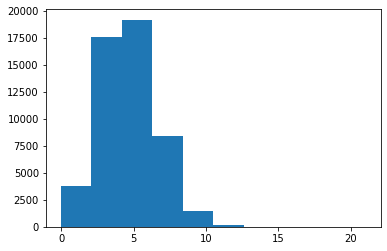

In [ ]:
# 한글 아닌 단어 제거 
train['trans_lyrics'] = train['trans_lyrics'].str.replace("[^가-힣ㄱ-하-ㅣ ]","")
train['trans_lyrics']

# 불용어 
stopwords = ["하다","한","에","와","자","과","걍","잘","좀","는","의","가","이","은","들"]

# 단어 토큰화 
from konlpy.tag import Okt 
import matplotlib.pyplot as plt 

okt = Okt()
tokenizedData = []

for sent in train['trans_lyrics']:
    t = okt.morphs(sent, stem=True) 
    # stem: 어근 추출
    # norm(표준화): 그래욬ㅋㅋ => 그래요
    [w for w in t if w not in stopwords] # for문부터 해석 => if문 => 조건문에 해당하는 w 순서로 해석
    tokenizedData.append(t)
    

# tokenizedData에 저장된 리뷰에 대해 
# 리뷰 최대 길이 
# 리뷰 평균 길이 

print(max(len(l) for l in tokenizedData))
#stem: 어근 , norm: 그래욬ㅋㅋ => 그래요 
print(sum(map(len, tokenizedData)) / len(tokenizedData))
plt.hist([len(s) for s in tokenizedData])
plt.show()

In [ ]:
tokenizedData

[['앞', '에선', '한마디', '도', '못', '하다'],
 ['뒤', '에선', '내', '얘길', '안', '좋다', '해'],
 ['차다', '어이', '가', '없다'],
 ['나', '같다', '이다', '처음'],
 ['으로', '으로', '으로'],
 ['보다', '것', '같다', '왜', '나르다', '판단', '하다'],
 ['내', '가', '혹시', '두렵다', '거니'],
 ['나르다', '자다', '알다', '못', '하다'],
 ['내', '겉모습', '만', '보다'],
 ['한심하다', '여자', '로', '보다'],
 ['너', '의', '시선', '이', '난', '너무나', '웃기다'],
 ['춤추다', '내', '모습', '을', '볼', '때', '는'],
 ['넋', '을', '놓다', '보고서', '는'],
 ['끝나다', '손가락질', '하다'],
 ['그', '위선', '이', '난', '너무나', '웃기다'],
 ['이렇다', '옷', '이렇다', '머리', '모양', '으로'],
 ['이렇다', '춤', '을', '추다', '여자', '는', '뻔하다'],
 ['하', '네', '가', '더', '뻔하다'],
 ['자신', '없다', '저'],
 ['뒤', '로', '뒤', '로', '뒤', '로'],
 ['물러서다', '되다', '왜', '자꾸', '떠들다'],
 ['네', '속이다', '훤히', '보이다', '건', '아니다'],
 ['나르다', '자다', '알다', '못', '하다'],
 ['내', '겉모습', '만', '보다'],
 ['한심하다', '여자', '로', '보다'],
 ['너', '의', '시선', '이', '난', '너무나', '웃기다'],
 ['춤추다', '내', '모습', '을', '볼', '때', '는'],
 ['넋', '을', '놓다', '보고서', '는'],
 ['끝나다', '손가락질', '하다'],
 ['그', '위선', '이', '난', '너무나', '웃기다'],
 ['

In [ ]:
model = Word2Vec(sentences=tokenizedData, 
        size=100,
        window=5,
        min_count=5,
        workers=4,
        sg=0)
        
model.wv.most_similar("행복")

[('인연', 0.9890269041061401),
 ('욕심', 0.985593855381012),
 ('겁', 0.9825108051300049),
 ('목숨', 0.9817980527877808),
 ('약', 0.9809798002243042),
 ('주인공', 0.9803466796875),
 ('언니', 0.9798390865325928),
 ('진심', 0.9795779585838318),
 ('눈꽃', 0.9795430898666382),
 ('악몽', 0.9794033765792847)]

In [ ]:
model.wv.most_similar("사랑", topn = 50)

[('마디', 0.845406711101532),
 ('말', 0.8431898355484009),
 ('시작', 0.8411989808082581),
 ('기억', 0.8360324501991272),
 ('얘기', 0.8273473978042603),
 ('이별', 0.8189257383346558),
 ('생각', 0.8041555881500244),
 ('걱정', 0.8029619455337524),
 ('키스', 0.7990971803665161),
 ('못', 0.7984437942504883),
 ('고백', 0.7975939512252808),
 ('약속', 0.7834932804107666),
 ('잘', 0.7771168351173401),
 ('표현', 0.7767658233642578),
 ('안녕', 0.7740181684494019),
 ('누구', 0.7732915878295898),
 ('주목', 0.7697375416755676),
 ('노력', 0.7614867687225342),
 ('짝사랑', 0.759395956993103),
 ('감정', 0.7553972005844116),
 ('픈', 0.7532793283462524),
 ('싫다', 0.7482389211654663),
 ('권', 0.7469264268875122),
 ('추억', 0.7464471459388733),
 ('노래', 0.7417981624603271),
 ('인정', 0.7379909753799438),
 ('연락', 0.7359604835510254),
 ('젠', 0.7352335453033447),
 ('아직도', 0.7340190410614014),
 ('사람', 0.7327432036399841),
 ('불장난', 0.7327368259429932),
 ('이해', 0.7314614057540894),
 ('준비', 0.7262700796127319),
 ('후회', 0.725871205329895),
 ('미안하다', 0.72579658

In [ ]:
model.wv.most_similar("슬픔", topn = 50)

[('어둠', 0.9912557005882263),
 ('침묵', 0.9891501069068909),
 ('빗속', 0.9867191314697266),
 ('예이예', 0.98629230260849),
 ('눈꽃', 0.9861381649971008),
 ('실망', 0.9857174158096313),
 ('바뀌다', 0.9852089881896973),
 ('빗물', 0.9845113754272461),
 ('간이역', 0.9829094409942627),
 ('색깔', 0.982846736907959),
 ('목', 0.9827846884727478),
 ('짐', 0.9827655553817749),
 ('다툼', 0.9817454814910889),
 ('알람', 0.9814510345458984),
 ('모양', 0.9814292192459106),
 ('검다', 0.9814265966415405),
 ('꺼지다', 0.9811205267906189),
 ('쓸쓸하다', 0.9811170101165771),
 ('감옥', 0.9810885190963745),
 ('외로움', 0.9810394644737244),
 ('멎다', 0.9809775352478027),
 ('시련', 0.9809688329696655),
 ('코스모스', 0.9809433221817017),
 ('멋', 0.9809005260467529),
 ('기운', 0.9808632135391235),
 ('드라마', 0.9804298877716064),
 ('개', 0.9804195165634155),
 ('방황', 0.9801757335662842),
 ('공간', 0.9798227548599243),
 ('색', 0.9797408580780029),
 ('인연', 0.979649007320404),
 ('대론', 0.979465663433075),
 ('현실', 0.9794337749481201),
 ('행운', 0.9794236421585083),
 ('주변', 0.9786

In [ ]:
model.wv.most_similar("짜증", topn = 50)

[('무너지다', 0.9952715635299683),
 ('매달리다', 0.9948098063468933),
 ('녹다', 0.9933241605758667),
 ('뭔가', 0.9931490421295166),
 ('멍청하다', 0.9931138753890991),
 ('물감', 0.9928573966026306),
 ('익다', 0.9927116632461548),
 ('치우다', 0.992698609828949),
 ('착각', 0.9925640821456909),
 ('폰', 0.992529034614563),
 ('어쩜', 0.9922693371772766),
 ('맴', 0.9922327995300293),
 ('주르르', 0.9921705722808838),
 ('귀찮다', 0.9920972585678101),
 ('저물다', 0.992074728012085),
 ('짜다', 0.9920248985290527),
 ('들어가다', 0.9919968843460083),
 ('촌', 0.9918913841247559),
 ('멋쟁이', 0.9918287992477417),
 ('새끼', 0.991772472858429),
 ('애가', 0.991605281829834),
 ('깎다', 0.9915305972099304),
 ('빠', 0.9914779663085938),
 ('환상', 0.9914287328720093),
 ('머', 0.9913647174835205),
 ('찰랑', 0.9913433790206909),
 ('약', 0.9913407564163208),
 ('벌', 0.9912649393081665),
 ('겠다', 0.9912530779838562),
 ('벽', 0.9912393093109131),
 ('조차도', 0.9910761117935181),
 ('악몽', 0.9910693168640137),
 ('물다', 0.990996778011322),
 ('간지', 0.9909619092941284),
 ('재', 0.99090

In [ ]:
model.wv.most_similar("슬픔", topn = 50)

[('어둠', 0.9912557005882263),
 ('침묵', 0.9891501069068909),
 ('빗속', 0.9867191314697266),
 ('예이예', 0.98629230260849),
 ('눈꽃', 0.9861381649971008),
 ('실망', 0.9857174158096313),
 ('바뀌다', 0.9852089881896973),
 ('빗물', 0.9845113754272461),
 ('간이역', 0.9829094409942627),
 ('색깔', 0.982846736907959),
 ('목', 0.9827846884727478),
 ('짐', 0.9827655553817749),
 ('다툼', 0.9817454814910889),
 ('알람', 0.9814510345458984),
 ('모양', 0.9814292192459106),
 ('검다', 0.9814265966415405),
 ('꺼지다', 0.9811205267906189),
 ('쓸쓸하다', 0.9811170101165771),
 ('감옥', 0.9810885190963745),
 ('외로움', 0.9810394644737244),
 ('멎다', 0.9809775352478027),
 ('시련', 0.9809688329696655),
 ('코스모스', 0.9809433221817017),
 ('멋', 0.9809005260467529),
 ('기운', 0.9808632135391235),
 ('드라마', 0.9804298877716064),
 ('개', 0.9804195165634155),
 ('방황', 0.9801757335662842),
 ('공간', 0.9798227548599243),
 ('색', 0.9797408580780029),
 ('인연', 0.979649007320404),
 ('대론', 0.979465663433075),
 ('현실', 0.9794337749481201),
 ('행운', 0.9794236421585083),
 ('주변', 0.9786

- 구글 word2vec 모델

In [ ]:
from gensim.models import Word2Vec
import gensim

word2vec_path = "/content/drive/MyDrive/가은/BOAZ/미니플젝_2022_06/코드/ko.bin"

In [ ]:
word2vec = gensim.models.Word2Vec.load(word2vec_path)

In [ ]:
word2vec.similar_by_word("행복")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('사랑', 0.6759077310562134),
 ('기쁨', 0.6493781805038452),
 ('즐거움', 0.6396492719650269),
 ('삶', 0.6299898028373718),
 ('젊음', 0.6187379360198975),
 ('즐겁', 0.6027448177337646),
 ('인생', 0.6002243161201477),
 ('존엄', 0.5952589511871338),
 ('고독', 0.5938762426376343),
 ('불행', 0.5894461870193481)]

In [ ]:
word2vec.similar_by_word("사랑")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('슬픔', 0.7216662764549255),
 ('행복', 0.6759077310562134),
 ('절망', 0.6468985080718994),
 ('기쁨', 0.6458414196968079),
 ('이별', 0.6334798336029053),
 ('추억', 0.6320937275886536),
 ('인생', 0.6216273307800293),
 ('애정', 0.6206069588661194),
 ('연인', 0.6186063289642334),
 ('유혹', 0.5965287685394287)]

In [ ]:
word2vec.similar_by_word("슬픔")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('기쁨', 0.7767106294631958),
 ('절망', 0.7710496783256531),
 ('아픔', 0.7430999279022217),
 ('비탄', 0.7297681570053101),
 ('고독', 0.7251476049423218),
 ('사랑', 0.7216662168502808),
 ('외로움', 0.7195188999176025),
 ('추억', 0.6951203346252441),
 ('이별', 0.6873862147331238),
 ('괴로움', 0.6854110956192017)]

## 4. 전처리 많이 함

In [ ]:
train

,Unnamed: 0,lyrics,artist,song_name,Year,trans_lyrics
0,8,앞에선 한마디도 못하더니,미쓰에이,Bad Girl Good Girl,2010,앞에선 한마디도 못하더니
1,9,뒤에선 내 얘길 안 좋게 해,미쓰에이,Bad Girl Good Girl,2010,뒤에선 내 얘길 안 좋게 해
2,10,참 어이가 없어,미쓰에이,Bad Girl Good Girl,2010,참 어이가 없어
3,12,나 같은 여잔 처음,미쓰에이,Bad Girl Good Girl,2010,나 같은 여잔 처음
4,13,으로 으로 으로,미쓰에이,Bad Girl Good Girl,2010,으로 으로 으로
...,...,...,...,...,...,...
50459,67263,아쉬워 눈물이 흘러,릴보이 (lIlBOI),"CREDIT (Feat. 염따, 기리보이, Zion.T)",2021,아쉬워 눈물이 흘러
50460,67264,내린대도 속이 편할지도 몰라,릴보이 (lIlBOI),"CREDIT (Feat. 염따, 기리보이, Zion.T)",2021,내린대도 속이 편할지도 몰라
50461,67268,올라가는 수많은 이름들 사이,릴보이 (lIlBOI),"CREDIT (Feat. 염따, 기리보이, Zion.T)",2021,올라가는 수많은 이름들 사이
50462,67269,난 기도해,릴보이 (lIlBOI),"CREDIT (Feat. 염따, 기리보이, Zion.T)",2021,난 기도해


In [ ]:
# 정규 표현식을 이용하여 한글, 숫자, 공백을 제외하고 모두 제거 
train['trans_lyrics'] = train['trans_lyrics'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]", "")

train[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Unnamed: 0,lyrics,artist,song_name,Year,trans_lyrics
0,8,앞에선 한마디도 못하더니,미쓰에이,Bad Girl Good Girl,2010,앞에선 한마디도 못하더니
1,9,뒤에선 내 얘길 안 좋게 해,미쓰에이,Bad Girl Good Girl,2010,뒤에선 내 얘길 안 좋게 해
2,10,참 어이가 없어,미쓰에이,Bad Girl Good Girl,2010,참 어이가 없어
3,12,나 같은 여잔 처음,미쓰에이,Bad Girl Good Girl,2010,나 같은 여잔 처음
4,13,으로 으로 으로,미쓰에이,Bad Girl Good Girl,2010,으로 으로 으로


In [ ]:
sample = train["trans_lyrics"]

In [ ]:
sample

0          앞에선 한마디도 못하더니
1        뒤에선 내 얘길 안 좋게 해
2               참 어이가 없어
3             나 같은 여잔 처음
4               으로 으로 으로
              ...       
50459         아쉬워 눈물이 흘러
50460    내린대도 속이 편할지도 몰라
50461    올라가는 수많은 이름들 사이
50462              난 기도해
50463             끝이 아니길
Name: trans_lyrics, Length: 50464, dtype: object

In [ ]:
# train_data에 document 열에 빈 값을 가진 행이 있다면 Null 값으로 변경
train['trans_lyrics'].replace('', np.nan, inplace=True)

# 다시 한 번 Null 값이 존재하는지 확인
train.isnull().sum()

Unnamed: 0      0
lyrics          0
artist          0
song_name       0
Year            0
trans_lyrics    0
dtype: int64

- null 데이터 제거

In [ ]:
# Null 값이 있는 행 5개만 출력
train.loc[train.trans_lyrics.isnull()][:5]

,Unnamed: 0,lyrics,artist,song_name,Year,trans_lyrics


In [ ]:
# NaN은 아무런 의미가 없는 데이터 이므로 제거
train_data = train.dropna(how = 'any')

print('전처리 후 학습용 데이터 개수 :', len(train_data))

전처리 후 학습용 데이터 개수 : 50464


- 토큰화

In [ ]:
train['trans_lyrics'][1]

'뒤에선 내 얘길 안 좋게 해'

In [ ]:
okt.pos(sample[1])

[('뒤', 'Noun'),
 ('에선', 'Josa'),
 ('내', 'Noun'),
 ('얘길', 'Noun'),
 ('안', 'Noun'),
 ('좋게', 'Adjective'),
 ('해', 'Noun')]

In [ ]:
train_token = []
for i in range(50464) :
  #["/".join(tag) for tag in okt.pos(train['trans_lyrics'][i])]
  train_token.append(["/".join(tag) for tag in okt.pos(train['trans_lyrics'][i])])

In [ ]:
train_token

[['앞/Noun', '에선/Josa', '한마디/Noun', '도/Josa', '못/VerbPrefix', '하더니/Verb'],
 ['뒤/Noun',
  '에선/Josa',
  '내/Noun',
  '얘길/Noun',
  '안/Noun',
  '좋게/Adjective',
  '해/Noun'],
 ['참/Verb', '어이/Noun', '가/Josa', '없어/Adjective'],
 ['나/Noun', '같은/Adjective', '여잔/Verb', '처음/Noun'],
 ['으로/Josa', '으로/Josa', '으로/Josa'],
 ['본/Verb',
  '것/Noun',
  '같은데/Adjective',
  '왜/Noun',
  '나를/Verb',
  '판단/Noun',
  '하니/Verb'],
 ['내/Noun', '가/Josa', '혹시/Noun', '두려운/Adjective', '거니/Eomi'],
 ['나를/Verb', '잘/Verb', '알지도/Verb', '못/VerbPrefix', '하면서/Verb'],
 ['내/Noun', '겉모습/Noun', '만/Josa', '보면서/Verb'],
 ['한심한/Adjective', '여자/Noun', '로/Josa', '보는/Verb'],
 ['너/Noun', '의/Josa', '시선/Noun', '이/Josa', '난/Noun', '너무나/Adverb', '웃겨/Verb'],
 ['춤추는/Verb', '내/Noun', '모습/Noun', '을/Josa', '볼/Noun', '때/Noun', '는/Josa'],
 ['넋/Noun', '을/Josa', '놓고/Verb', '보고서/Noun', '는/Josa'],
 ['끝나니/Verb', '손가락질/Noun', '하는/Verb'],
 ['그/Noun', '위선/Noun', '이/Josa', '난/Noun', '너무나/Adverb', '웃겨/Verb'],
 ['이런/Adjective', '옷/Noun', '이런/Adjective', '머리/Noun', '모

- word2vec

In [ ]:
word2vec = Word2Vec(size = 300, alpha = 0.025, seed = 1, sg = 1, min_alpha = 0.025)
word2vec.build_vocab(train['trans_lyrics'])

for epoch in range(30):
  word2vec.train(train_token, total_examples = word2vec.corpus_count, epochs = word2vec.iter)
  word2vec.alpha -= 0.002
  word2vec.min_alpha = word2vec.alpha
  print("epochs : {}/30".format(epoch+1))
word2vec.save("./word2vec.model")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


epochs : 1/30
epochs : 2/30
epochs : 3/30
epochs : 4/30
epochs : 5/30
epochs : 6/30
epochs : 7/30
epochs : 8/30
epochs : 9/30
epochs : 10/30
epochs : 11/30
epochs : 12/30
epochs : 13/30
epochs : 14/30
epochs : 15/30
epochs : 16/30
epochs : 17/30
epochs : 18/30
epochs : 19/30
epochs : 20/30
epochs : 21/30
epochs : 22/30
epochs : 23/30
epochs : 24/30
epochs : 25/30
epochs : 26/30
epochs : 27/30
epochs : 28/30
epochs : 29/30
epochs : 30/30


In [ ]:
word2vec.most_similar("최고")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

## 5. 얜 뭐였징

In [ ]:
# 테스트 데이터도 정규 표현식을 이용하여 한글, 숫자, 공백을 제외하고 모두 제거 
train['trans_lyrics'] = train['trans_lyrics'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]", "")
# test_data에 document 열에 빈 값을 가진 행이 있다면 Null 값으로 변경
train['trans_lyrics'].replace('', np.nan, inplace=True)
# NaN은 아무런 의미가 없는 데이터 이므로 제거
test_data = train.dropna(how = 'any')

print('전처리 후 테스트용 데이터 개수 :', len(test_data))

전처리 후 테스트용 데이터 개수 : 50464


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# Mecab 설치 참고 : https://somjang.tistory.com/entry/PythonUbuntu에-mecab-ko-dic-라이브러리-설치하기
from konlpy.tag import Mecab        # Mecab : 일본어 형태소 분석기

# 형태소 분석기 객체 생성
tokenizer = Mecab()

# 불용어 리스트
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    # 학습용 데이터에서 trans_lyrics 열에서 중복 데이터 제거
    train_data.drop_duplicates(subset=['trans_lyrics'], inplace=True)
    # 학습용 데이터에서 Null 값이 존재하는 행 제거
    train_data = train_data.dropna(how = 'any') 
    # 테스트용 데이터에서 trans_lyrics 열에서 중복 데이터 제거
    test_data.drop_duplicates(subset=['trans_lyrics'], inplace=True)
    # 테스트용 데이터에서 Null 값이 존재하는 행 제거
    test_data = test_data.dropna(how = 'any') 
    
    # 한국어 토크나이저로 토큰화 및 불용어 제거
    x_train = []
    for sentence in train_data['trans_lyrics']:
        temp_x = tokenizer.morphs(sentence) # 형태소 단위로 토큰화
        temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
        x_train.append(temp_x)

    x_test = []
    for sentence in test_data['trans_lyrics']:
        temp_x = tokenizer.morphs(sentence) 
        temp_x = [word for word in temp_x if not word in stopwords] 
        x_test.append(temp_x)

    # 사전 작성
    words = np.concatenate(x_train).tolist()   # .tolist() : array를 list로 변경
    counter = Counter(words)                   # collection 모듈의 Counter 클래스로 데이터의 개수 확인
    counter = counter.most_common(10000-4)     # most_common() : 데이터의 개수가 많은 순으로 정렬된 배열 리턴
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    # word_to_index
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        # wordlist에 있는 word에 대해서 만약에 word가 word_to_index에 존재하면 인덱스 값을, 존재하지 않으면 <UNK>를 인덱스로 반환함

    x_train = list(map(wordlist_to_indexlist, x_train))   # x_train 대상으로 wordlist_to_indexlist 함수를 수행하여 리스트로 반환
    x_test = list(map(wordlist_to_indexlist, x_test))

    return x_train, x_test, word_to_index

x_train, x_test, word_to_index = load_data(train_data, test_data) 

In [ ]:
print("훈련 데이터 개수: {},  테스트 데이터 개수: {}".format(len(x_train), len(x_test)))

훈련 데이터 개수: 32297,  테스트 데이터 개수: 32297


In [ ]:
x_train

[[154, 947, 687, 279, 1132],
 [247, 846, 8, 1033, 34, 56, 11, 14],
 [101, 7, 19, 7],
 [6, 36, 1273, 183],
 [],
 [446, 38, 36, 223, 52, 6, 2168, 12, 25],
 [8, 339, 1527, 35, 25],
 [6, 48, 10, 279, 185],
 [8, 4126, 18, 33, 185],
 [2431, 171, 42, 33],
 [9, 555, 20, 357, 1964],
 [1034, 8, 140, 5, 155, 57],
 [1965, 5, 180, 4, 33, 531],
 [99, 6, 25, 1133, 284, 12],
 [28, 4127, 20, 357, 1964],
 [147, 503, 147, 244, 1798],
 [147, 421, 5, 819, 171, 1074],
 [12, 24, 32, 1074],
 [475, 19, 173, 163],
 [247, 42, 247, 42, 247, 42],
 [2784, 29, 70, 10, 52, 96, 4128, 25],
 [24, 68, 2785, 202, 89, 110],
 [23, 1437, 53, 27, 16, 1347, 187, 175],
 [358, 148, 187, 175],
 [15, 42, 18, 148, 1199, 199, 53, 148, 15, 4],
 [23, 435, 14, 12, 10, 30, 5, 1075, 19, 215],
 [475, 236, 4129],
 [8, 6, 81, 27, 16, 11],
 [948, 1134, 11, 88, 4, 1528, 213],
 [422, 11, 982, 10, 65],
 [285, 347, 14, 44],
 [378, 100, 1656, 216, 50, 15, 5, 34, 203, 25],
 [117, 387, 18, 508],
 [301, 1135, 33, 4, 670, 114, 12, 146],
 [126, 208, 1

In [ ]:
# key= index, value= word로 변경
index_to_word = {index:word for word, index in word_to_index.items()}

In [ ]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [ ]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

문장길이 평균 :  5.316809610799765
문장길이 최대 :  19
문장길이 표준편차 :  1.9138196467335817


In [ ]:
decoded_sentences = get_decoded_sentences(x_train, index_to_word)

In [ ]:
print(decoded_sentences[0:5])

['선 한마디 못하 더니', '에선 내 얘길 안 좋 게 해', '어 없 어', '같 여잔 처음', '']


In [ ]:
decoded_sentences

['선 한마디 못하 더니',
 '에선 내 얘길 안 좋 게 해',
 '어 없 어',
 '같 여잔 처음',
 '',
 '것 같 은데 왜 나 판단 하 니',
 '혹시 두려운 거 니',
 '알 지 못하 면서',
 '겉모습 만 보 면서',
 '여자 로 보',
 '시선 난 너무나 웃겨',
 '내 모습 을 볼 때',
 '을 놓 고 보 고서',
 '나 니 손가락 질 하',
 '위선 난 너무나 웃겨',
 '옷 이런 머리 모양',
 '춤 을 추 여자 뻔해',
 '네 더 뻔해',
 '없 으면 저',
 '로 뒤 로 뒤 로',
 '면 되 지 왜 자꾸 떠드 니',
 '속 훤히 보이 건 아니',
 '감당 할 수 있 남잘 찾 아요',
 '남자 찾 아요',
 '로 만 남자 다운 척 할 남자 말 고',
 '불안 해 하 지 않 을 남잔 없 나요',
 '감 넘쳐서',
 '나 일 수 있 게',
 '롭 게 두 고 멀리서 바라보',
 '게 다니 지 마',
 '멀리 해 봐',
 '살 짜리 애 처럼 말 을 안 듣 니',
 '웃음 만 나와',
 '누굴 보 고 아이 라 하 는지',
 '얘기 하 게 되 내 맘 을 몰라',
 '얘기 만 나누 고 싶 내 맘 을 몰라',
 '할까 그만 하',
 '부터 열 까지 다 널 위한 소리',
 '말 듣 지 않 너 에게 뻔한 잔소리',
 '하 그만 하',
 '하 기 만 해도 시간 없 는데',
 '아닌 가슴 하 이야기',
 '싫 다 해도 안 할 수 없 이야기',
 '잔소리 들려',
 '제 때 먹 는지',
 '멀리 하 는지',
 '종일 을 네 옆 있 고 싶 은데',
 '그 맘 인 거 야',
 '속 널 넣 고 다니 면',
 '행복 할 텐데',
 '아니 면 안 되 우리 이야기',
 '듣 는다면 놀려 대 고 웃 을 이야기',
 '힘 을 주 고 겁 을 줘 봐도',
 '그저 귀여운 얼굴',
 '자꾸 더 못 참 고',
 '화 낼지 몰라',
 '하 다 말 거 라면 안 할 이야기',
 '보다 너 생각 하 마음 소리',
 '나 소리 쳐도',
 '잔소리 마저 난 달콤 한데',
 '해야 할 수 있 그

## 6. 주리언니꺼 참고!

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
train.dropna(inplace = True)
train.reset_index(drop = True, inplace = True)

In [ ]:
train['가사전처리']

0            [한마디, 못하, 더니]
1                 [에선, 얘길]
2                 [여잔, 처음]
3             [으로, 으로, 으로]
4                 [은데, 판단]
               ...        
48690        [아쉬워, 눈물, 흘러]
48691    [내린, 대도, 편할지, 몰라]
48692    [올라가, 수많, 이름, 사이]
48693                 [기도]
48694                 [아니]
Name: 가사전처리, Length: 48695, dtype: object

In [ ]:
train['가사전처리'] = train['trans_lyrics'].str.replace("[^가-힣ㄱ-하-ㅣ ]","")
train['가사전처리']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0            앞에선 한마디도 못하더니
1          뒤에선 내 얘길 안 좋게 해
2               나 같은 여잔 처음
3                 으로 으로 으로
4        본 것 같은데 왜 나를 판단하니
               ...        
48690           아쉬워 눈물이 흘러
48691      내린대도 속이 편할지도 몰라
48692      올라가는 수많은 이름들 사이
48693                난 기도해
48694               끝이 아니길
Name: 가사전처리, Length: 48695, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


21
4.9993633843310405


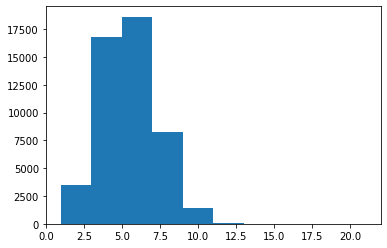

In [ ]:
# 한글 아닌 단어 제거 
train['가사전처리'] = train['trans_lyrics'].str.replace("[^가-힣ㄱ-하-ㅣ ]","")
train['가사전처리']

# 불용어 
stopwords = ["하다","한","에","와","자","과","걍","잘","좀","는","의","가","이","은","들"]

# 단어 토큰화 
from konlpy.tag import Okt 
import matplotlib.pyplot as plt 

okt = Okt()
tokenizedData = []

for sent in train['trans_lyrics']:
    t = okt.morphs(sent, stem=True) 
    # stem: 어근 추출
    # norm(표준화): 그래욬ㅋㅋ => 그래요
    [w for w in t if w not in stopwords] # for문부터 해석 => if문 => 조건문에 해당하는 w 순서로 해석
    [word for word in t if len(word) != 1]
    np.NaN if t==[] else t
    tokenizedData.append(t)
    

# tokenizedData에 저장된 리뷰에 대해 
# 리뷰 최대 길이 
# 리뷰 평균 길이 

print(max(len(l) for l in tokenizedData))
#stem: 어근 , norm: 그래욬ㅋㅋ => 그래요 
print(sum(map(len, tokenizedData)) / len(tokenizedData))
plt.hist([len(s) for s in tokenizedData])
plt.show()

In [ ]:
tokenizedData

[['앞', '에선', '한마디', '도', '못', '하다'],
 ['뒤', '에선', '내', '얘길', '안', '좋다', '해'],
 ['나', '같다', '이다', '처음'],
 ['으로', '으로', '으로'],
 ['보다', '것', '같다', '왜', '나르다', '판단', '하다'],
 ['내', '가', '혹시', '두렵다', '거니'],
 ['나르다', '자다', '알다', '못', '하다'],
 ['내', '겉모습', '만', '보다'],
 ['한심하다', '여자', '로', '보다'],
 ['너', '의', '시선', '이', '난', '너무나', '웃기다'],
 ['춤추다', '내', '모습', '을', '볼', '때', '는'],
 ['넋', '을', '놓다', '보고서', '는'],
 ['끝나다', '손가락질', '하다'],
 ['그', '위선', '이', '난', '너무나', '웃기다'],
 ['이렇다', '옷', '이렇다', '머리', '모양', '으로'],
 ['이렇다', '춤', '을', '추다', '여자', '는', '뻔하다'],
 ['하', '네', '가', '더', '뻔하다'],
 ['자신', '없다', '저'],
 ['물러서다', '되다', '왜', '자꾸', '떠들다'],
 ['네', '속이다', '훤히', '보이다', '건', '아니다'],
 ['나르다', '자다', '알다', '못', '하다'],
 ['내', '겉모습', '만', '보다'],
 ['한심하다', '여자', '로', '보다'],
 ['너', '의', '시선', '이', '난', '너무나', '웃기다'],
 ['춤추다', '내', '모습', '을', '볼', '때', '는'],
 ['넋', '을', '놓다', '보고서', '는'],
 ['끝나다', '손가락질', '하다'],
 ['그', '위선', '이', '난', '너무나', '웃기다'],
 ['날', '감당', '하다', '수', '있다', '남다', '찾다'],
 ['진짜', '남자', '를', 

In [ ]:
train.dropna(inplace = True)
train.reset_index(drop = True, inplace = True)

In [ ]:
train.가사전처리

0            앞에선 한마디도 못하더니
1          뒤에선 내 얘길 안 좋게 해
2               나 같은 여잔 처음
3                 으로 으로 으로
4        본 것 같은데 왜 나를 판단하니
               ...        
48690           아쉬워 눈물이 흘러
48691      내린대도 속이 편할지도 몰라
48692      올라가는 수많은 이름들 사이
48693                난 기도해
48694               끝이 아니길
Name: 가사전처리, Length: 48695, dtype: object

In [ ]:
train['가사전처리']=train['가사전처리'].map(lambda x : mecab.morphs(x)) #명사만 추출
train['가사전처리']=train['가사전처리'].map(lambda x : [word for word in x if len(word) != 1]) #한글자 제거
train['가사전처리']=train['가사전처리'].map(lambda x : np.NaN if x==[] else x ) #빈 리스트 nan으로 바꿔주기

In [ ]:
train.dropna(inplace = True)
train.reset_index(drop = True, inplace = True)

In [ ]:
train.가사전처리

0            [한마디, 못하, 더니]
1                 [에선, 얘길]
2                 [여잔, 처음]
3             [으로, 으로, 으로]
4                 [은데, 판단]
               ...        
48690        [아쉬워, 눈물, 흘러]
48691    [내린, 대도, 편할지, 몰라]
48692    [올라가, 수많, 이름, 사이]
48693                 [기도]
48694                 [아니]
Name: 가사전처리, Length: 48695, dtype: object

In [ ]:
from gensim.models import Word2Vec

In [ ]:
#모델 학습
model = Word2Vec(train.가사전처리, window=5, min_count=3, size=300)

In [ ]:
model.wv.similar_by_word('슬픔', topn=50)

[('심장', 0.999908983707428),
 ('상처', 0.9999059438705444),
 ('눈빛', 0.9999043345451355),
 ('못해', 0.9999017715454102),
 ('조차', 0.9998997449874878),
 ('홀로', 0.9998985528945923),
 ('얼굴', 0.9998970627784729),
 ('음악', 0.9998956918716431),
 ('아침', 0.9998956322669983),
 ('익숙', 0.9998937845230103),
 ('아마', 0.9998931884765625),
 ('어느새', 0.9998915195465088),
 ('꺼내', 0.9998913407325745),
 ('점점', 0.9998912811279297),
 ('이상', 0.999890923500061),
 ('사진', 0.9998897314071655),
 ('오빠', 0.9998893737792969),
 ('걸까', 0.9998880624771118),
 ('계속', 0.9998880624771118),
 ('인생', 0.9998877048492432),
 ('은데', 0.9998873472213745),
 ('가득', 0.9998868107795715),
 ('전화', 0.999886155128479),
 ('미소', 0.9998854398727417),
 ('아닌', 0.9998853802680969),
 ('아픔', 0.9998846650123596),
 ('위해', 0.9998844861984253),
 ('마저', 0.9998840689659119),
 ('약속', 0.9998834133148193),
 ('기대', 0.999883234500885),
 ('버렸', 0.9998830556869507),
 ('아도', 0.9998818635940552),
 ('혼자', 0.9998810887336731),
 ('예쁜', 0.9998800754547119),
 ('돌아가', 0.999879

In [ ]:
model.wv.similar_by_word('짜증', topn=50)

[('모두', 0.9995107650756836),
 ('얘기', 0.9995089769363403),
 ('그렇', 0.999505877494812),
 ('이미', 0.9995040893554688),
 ('버릴', 0.9994992613792419),
 ('거짓말', 0.9994973540306091),
 ('결국', 0.9994969367980957),
 ('무슨', 0.9994956851005554),
 ('그러', 0.9994953870773315),
 ('이렇', 0.9994952082633972),
 ('그렇게', 0.9994946122169495),
 ('이별', 0.9994919300079346),
 ('아마', 0.9994915127754211),
 ('누가', 0.9994912147521973),
 ('진짜', 0.9994900226593018),
 ('이젠', 0.9994882345199585),
 ('보내', 0.9994857311248779),
 ('여자', 0.9994857311248779),
 ('내겐', 0.9994842410087585),
 ('시선', 0.9994831681251526),
 ('목소리', 0.9994831085205078),
 ('혼자', 0.9994819164276123),
 ('엄마', 0.9994818568229675),
 ('한잔', 0.9994817972183228),
 ('그녀', 0.9994815587997437),
 ('던지', 0.9994814395904541),
 ('마음', 0.9994802474975586),
 ('심장', 0.9994797706604004),
 ('볼래', 0.9994794726371765),
 ('조차', 0.9994791746139526),
 ('같이', 0.9994789361953735),
 ('인생', 0.9994784593582153),
 ('인데', 0.999478280544281),
 ('소리', 0.9994773864746094),
 ('표정', 0.999

- 불용어 많이

In [ ]:
with open("/content/drive/MyDrive/가은/BOAZ/미니플젝_2022_06/코드/stopwords.txt", "r", encoding='cp949') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in remove_one_word if x not in stopwords]
len(remove_stopwords)

95872